# Classification with K-Nearest Neighbors
By Josh Houlding

Machine learning algorithms help to provide instant predictive results for large amounts of data. One such algorithm, the k-nearest neighbor (kNN) is used for pattern classification, regression models, and is ideal for data mining. Some real-world examples of its use include determining credit card ratings, identifying who's likely to default on a loan, detecting unusual patterns in credit card usage, or predicting the future value of stocks.

# Part 1
To perform a classification using the k-nearest neighbors algorithm, complete the following:
1. Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 datasets that are suitable for use in a classification task. For this part of the exercise, you must choose one of these datasets, provided it includes at least 10 attributes and 10,000 instances.
2. You may search for data in other repositories, such as Data.gov, Kaggle or Scikit Learn.
3. Discuss the origin of the data and assess whether it was obtained in an ethical manner.

# Part 2
For your selected dataset, build a classification model as follows:
1. Explain the dataset and the type of information you wish to gain by applying a classification method.
2. Explain the k-nearest neighbors algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions). Assume k = 5 using the Euclidian distance. Explain the value of k.
3. Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.
4. Clean the data and address unusual phenomena (e.g., normalization, outliers, missing data, encoding); use illustrative diagrams and plots and explain them.
5. Formulate two questions that can be answered by applying a classification method using the k-nearest neighbors method.
6. Split the data into 80% training and 20% testing sets.
7. Train the k-nearest neighbors classifier on the training set using the following parameters: k = 5, metric = 'minkowski', p = 2. 
8. Make classification predictions.
9. Interpret the results in the context of the questions you asked.
10. Validate your model using a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then explain the results.
11. Include all mathematical formulas used and graphs representing the final outcomes. <br><br>

<hr style="height:2px">

# <span style="color:#8080ff">Part 1</span>

# Tasks 1.1 and 1.2
<b>1.1:</b> Access the "UCI Machine Learning Repository," located in the topic Resources. Note: There are about 120 datasets that are suitable for use in a classification task. For this part of the exercise, you must choose one of these datasets, provided it includes at least 10 attributes and 10,000 instances. 

<b>1.2:</b> You may search for data in other repositories, such as Data.gov, Kaggle or Scikit Learn.

After browsing the UCI ML Repository for classification datasets, I found one for predicting whether an adult will make more than <span>&dollar;</span>50k/year based on various factors, such as age, education level, marital status, occupation, capital gains, and so on. 

<b>Dataset Link:</b> https://archive.ics.uci.edu/dataset/2/adult

# Task 1.3
Discuss the origin of the data and assess whether it was obtained in an ethical manner.

The UCI ML Repo page for this dataset indicates that it was extracted from the 1994 Census database by Barry Becker of Silicon Graphics. US Census data is collected and made publicly available in a highly professional and ethical manner, so this dataset was collected ethically by extension. 

# <span style="color:#1f6635">Part 2</span>

# Task 2.1
Explain the dataset and the type of information you wish to gain by applying a classification method.

As previously mentioned, this dataset can be used to predict whether a person will make more than <span>&dollar;</span>50k/year based on various socioeconomic factors. Because there are exactly two classes to sort entries into, this can be considered a binary classification problem. 

# Task 2.2
Explain the k-nearest neighbors algorithm and how you will be using it in your analysis (list the steps, the intuition behind the mathematical representation, and address its assumptions). Assume k = 5 using the Euclidian distance. Explain the value of k.

The purpose of the k-nearest neighbors (kNN) algorithm is to group similar items together based on Euclidean distances between their respective points on a graph. First, the data needs to be loaded, then $k$, the number of neighbors, must be initialized ($k = 5$ in this case). This variable represents the number of other points that will be considered when classifying a specific query point. The distance between the query point and current point is now calculated, and the distance and index are added to an ordered collection. Next, the algorithm sorts this collection from smallest to largest and picks the first 5 entries, which constitute the nearest neighbors. Finally, the labels of these entries are acquired, and in classification tasks, kNN returns the mode of these labels. 

In our case, we will be using kNN to perform binary classification to predict whether someone makes over <span>&dollar;</span>50k/year. 

# Tasks 2.3 and 2.4
<b>2.3:</b> Import the necessary libraries, then read the dataset into a data frame and perform initial statistical exploration.

<b>2.4:</b> Clean the data and address unusual phenomena (e.g., normalization, outliers, missing data, encoding); use illustrative diagrams and plots and explain them.

In [219]:
import pandas as pd

# Load dataset
df = pd.read_csv("adult.csv")

# View data
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


The column `fnlwgt` is useful for population-level analysis, but for our purposes of building a predictive model, it is not necessary and can be removed. 

Additionally, `education` and `education_num` contain the same data, so we will remove `education` since `education_num` is more suitable for modeling due to being numeric. 

In [220]:
# Drop unnecessary columns
df.drop(columns={"fnlwgt", "education"}, inplace=True)

# Rename "education_num" to "education"
df.rename(columns={"education_num": "education"}, inplace=True)

### Dataset info

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  int64 
 3   marital_status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital_gain    32561 non-null  int64 
 9   capital_loss    32561 non-null  int64 
 10  hours_per_week  32561 non-null  int64 
 11  native_country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


### Descriptive statistics

In [222]:
df.describe().round(2)

,age,education,capital_gain,capital_loss,hours_per_week
count,32561.00,32561.00,32561.00,32561.00,32561.00
mean,38.58,10.08,1077.65,87.30,40.44
std,13.64,2.57,7385.29,402.96,12.35
min,17.00,1.00,0.00,0.00,1.00
25%,28.00,9.00,0.00,0.00,40.00
50%,37.00,10.00,0.00,0.00,40.00
75%,48.00,12.00,0.00,0.00,45.00
max,90.00,16.00,99999.00,4356.00,99.00


### Handling missing values

In [223]:
# Check for rows with missing values
df[df.isna().any(axis=1)]

,age,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


An initial test says there are no rows with missing values, but the UCI ML Repository page for the dataset claims that `workclass`, `occupation` and `native_country` have missing values. We should check the unique values for these to see if some placeholder value has been used to represent a missing value. 

I learned that an issue with the CSV file led to every object column having an extra white space before each value, so all object columns must be trimmed. 

In [224]:
# Trim object values
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

Now, we check the unique values of these three columns to see if there are any placeholders present: 

In [225]:
# Check columns for placeholders
for col in ["workclass", "occupation", "native_country"]: 
    print(f"Unique values in column {col}: {df[col].unique()}")

Unique values in column workclass: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in column occupation: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Unique values in column native_country: ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


We see a placeholder value "?" appear in all three columns. Let's see how common this value is. 

In [226]:
# Check for prevalence of "?" placeholder
for col in ["workclass", "occupation", "native_country"]: 
    placeholder_count = df[col].value_counts()["?"]
    print(f"Placeholder values in column {col}: {placeholder_count}/{len(df)}")

Placeholder values in column workclass: 1836/32561
Placeholder values in column occupation: 1843/32561
Placeholder values in column native_country: 583/32561


We see that about 5% of the values in `workclass` and `occupation` are placeholders, and about 1.7% of the values in `native_country` are. Because these percentages are small, it is easiest to simply drop the entries with "?" values. 

In [227]:
import numpy as np

print("Row count before dropping:", len(df))

# Drop rows with missing values
df.replace("?", np.nan, inplace=True)
df.dropna(inplace=True)

print("Row count after dropping:", len(df))

Row count before dropping: 32561
Row count after dropping: 30162


Finally, we make sure there are no rows with missing values that we missed.

In [228]:
# Check again for rows with missing values
print("Rows with missing values:", len(df[df.isna().any(axis=1)]))

Rows with missing values: 0


### Value counts and distributions

In [229]:
# Check balance of target "income"
df["income"].value_counts()

income
<=50K    22654
>50K      7508
Name: count, dtype: int64

We see a significant class imbalance in the target variable, in that there are a lot more people with incomes at most <span>&dollar;</span>50k than there are those with incomes above <span>&dollar;</span>50k. This could have an impact on the accuracy of the model because it will be far more familiar with the majority class. 

We will now explore the distributions of the numeric variables within our data. 

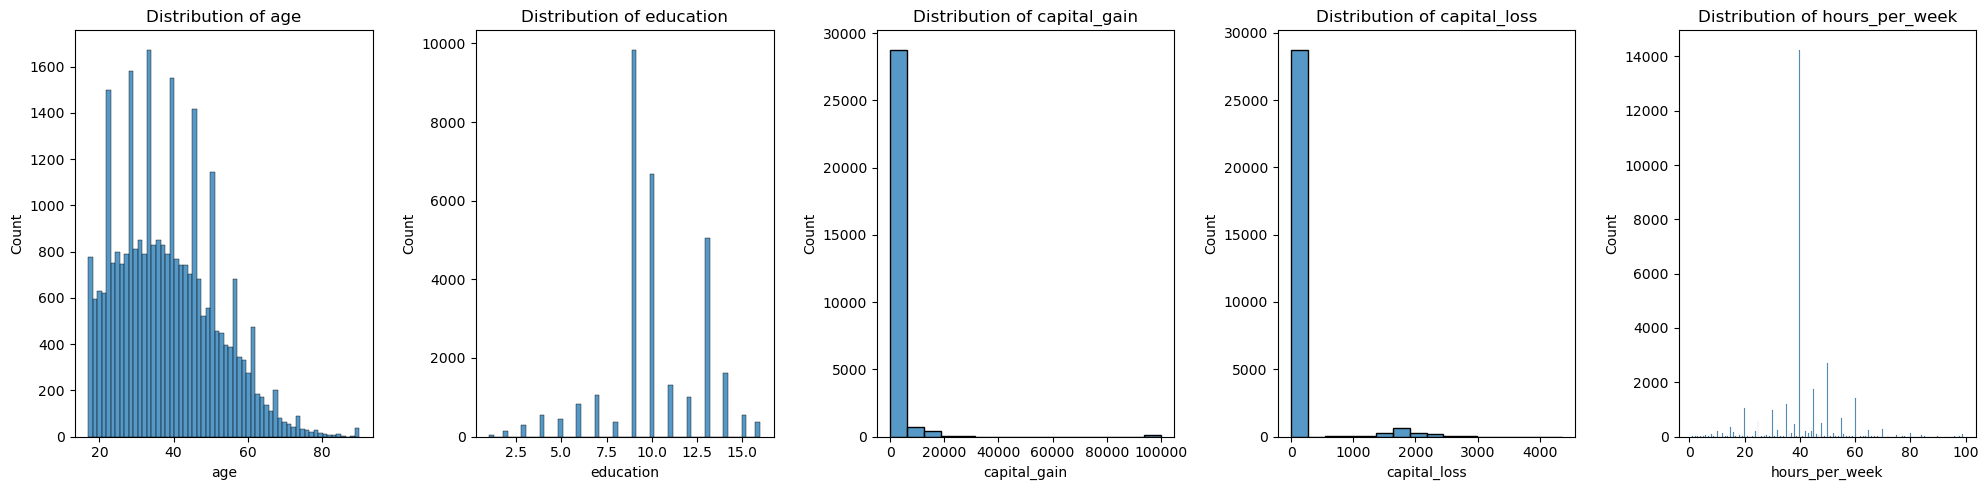

In [230]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"])

# Create 1x5 grid for histograms
fig, axes = plt.subplots(1, 5, figsize=(20, 5), tight_layout=True)

# Plot histograms
for ax, col in zip(axes, numeric_columns): 
    sns.histplot(df[col], ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.show() # Show histograms

We see that the mean age is about 35, the typical education level is about 9, and that the vast majority of people have zero capital gains or losses and work 40 hours a week. 

### Applying label encoding and one-hot encoding 

My research indicates that label encoding is more suitable for ordinal variables, and one-hot encoding is better for nominal variables. Thus, we will categorize each categorical variable into either ordinal or nominal to decide which type of encoding to use. 

* `workclass`: Nominal
* `education_num`: Ordinal (already numeric, so nothing needs to be done)
* `marital_status`: Nominal
* `occupation`: Nominal
* `relationship`: Nominal
* `race`: Nominal
* `sex`: Nominal
* `native_country`: Nominal

The target variable `income` must also be encoded, so let's do that now as well. 

In [231]:
# Apply one-hot encoding to nominal categorical variables
nominal_variables = ["workclass", "marital_status", "occupation", "relationship", "race", "sex", "native_country"]
df = pd.get_dummies(df, columns=nominal_variables, drop_first=True)

# Encode "income" as 0 or 1
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

df.head(1) # View results

,age,education,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,39,13,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Normalizing numeric variables

We must apply a normalization process to numeric variables so they are all on the same scale for modeling. 

In [232]:
from sklearn.preprocessing import MinMaxScaler

# Select numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Initialize and apply scaler
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head(1) # View results

,age,education,capital_gain,capital_loss,hours_per_week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native_country_Portugal,native_country_Puerto-Rico,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia
0,0.30137,0.8,0.02174,0.0,0.397959,0.0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


# Task 2.5
Formulate two questions that can be answered by applying a classification method using the k-nearest neighbors method.

<b>Question 1:</b> "Can we predict whether a person makes over <span>&dollar;</span>50k a year from their age, education level, hours worked per week and capital gains? <br>
<b>Question 2:</b> "Can we predict whether a person makes over <span>&dollar;</span>50k a year from their workclass, occupation and marital status? <br>

We will build separate kNN models to answer each of these questions. 

# Task 2.6
Split the data into 80% training and 20% testing sets.

In [233]:
from sklearn.model_selection import train_test_split

# Select Q1 features
features_q1 = ["age", "education", "hours_per_week"]
x_q1 = df[features_q1]

# Select Q2 features
original_q2_columns = ["workclass", "occupation", "marital_status"]
features_q2 = [col for col in df.columns if any(col.startswith(prefix) for prefix in original_q2_columns)]
x_q2 = df[features_q2]

# Define target
y = df["income"]

# Perform train-test split for each feature set
x_train_q1, x_test_q1, y_train_q1, y_test_q1 = train_test_split(x_q1, y, test_size=0.2, random_state=42)
x_train_q2, x_test_q2, y_train_q2, y_test_q2 = train_test_split(x_q2, y, test_size=0.2, random_state=42)

# Display shapes of training and testing sets
print("Question 1 data")
print(f"Training set shape: x = {x_train_q1.shape} | y = {y_train_q1.shape}.")
print(f"Testing set shape: x = {x_test_q1.shape} | y = {y_test_q1.shape}.")
print()

print("Question 2 data")
print(f"Training set shape: x = {x_train_q2.shape} | y = {y_train_q2.shape}.")
print(f"Testing set shape: x = {x_test_q2.shape} | y = {y_test_q2.shape}.")

Question 1 data
Training set shape: x = (24129, 3) | y = (24129,).
Testing set shape: x = (6033, 3) | y = (6033,).

Question 2 data
Training set shape: x = (24129, 25) | y = (24129,).
Testing set shape: x = (6033, 25) | y = (6033,).


# Task 2.7
Train the k-nearest neighbors classifier on the training set using the following parameters: k = 5, metric = 'minkowski', p = 2.

With $p=2$, we are applying the following formula to calculate the Minkowski distance: 
$% Specific case for p=2 (Euclidean distance)
\begin{equation}
d(\mathbf{x}, \mathbf{y}) = \sqrt{ \sum_{i=1}^n (x_i - y_i)^2 }
\end{equation}$

In [234]:
from sklearn.neighbors import KNeighborsClassifier

# Create kNN classifier for both questions
knn_q1 = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_q2 = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)

# Train kNN classifiers on training sets
knn_q1.fit(x_train_q1, y_train_q1);
knn_q2.fit(x_train_q2, y_train_q2);

# Task 2.8
Make classification predictions.

In [235]:
# Make classification predictions for Q1
y_pred_q1 = knn_q1.predict(x_test_q1)

# Make classification predictions for Q2
y_pred_q2 = knn_q2.predict(x_test_q2)

# Tasks 2.9 and 2.10
<b>2.9:</b> Interpret the results in the context of the questions you asked.

<b>2.10:</b> Validate your model using a confusion matrix, accuracy score, ROC-AUC curves, and k-fold cross validation. Then explain the results. <br><br>

<span style="color:blue">Scikit-Learn Confusion Matrix Format</span>
<table style="margin-left:0;">
    <tr>
        <td>True Negatives</td>
        <td>False Positives</td>
    </tr>
    <tr>
        <td>False Negatives</td>
        <td>True Positives</td>
    </tr>
    </table>

### Generating confusion matrices

In [236]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Create dataframes with predicted and actual values for Q1 and Q2 models
q1_results = pd.DataFrame({"actual": y_test_q1, "predicted": y_pred_q1})
q2_results = pd.DataFrame({"actual": y_test_q2, "predicted": y_pred_q2})

# Generate confusion matrix for Q1 model
cm_q1 = confusion_matrix(y_test_q1, y_pred_q1)
print("Confusion matrix for Q1")
print(cm_q1,"\n")

# Generate confusion matrix for Q2 model
cm_q2 = confusion_matrix(y_test_q2, y_pred_q2)
print("Confusion matrix for Q2")
print(cm_q2)

Confusion matrix for Q1
[[3934  569]
 [ 856  674]] 

Confusion matrix for Q2
[[4000  503]
 [ 831  699]]


The confusion matrices for both models indicate that most classifications are either true positives or true negatives, with true negatives being the largest category for both. 

### Generating classification reports

In [237]:
# Generate classification report for Q1 model
report_q1 = classification_report(y_test_q1, y_pred_q1)
print("Classification report for Q1")
print(report_q1)

# Generate classification report for Q2 model
report_q2 = classification_report(y_test_q2, y_pred_q2)
print("Classification report for Q2")
print(report_q2)

Classification report for Q1
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85      4503
         1.0       0.54      0.44      0.49      1530

    accuracy                           0.76      6033
   macro avg       0.68      0.66      0.67      6033
weighted avg       0.75      0.76      0.76      6033

Classification report for Q2
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      4503
         1.0       0.58      0.46      0.51      1530

    accuracy                           0.78      6033
   macro avg       0.70      0.67      0.68      6033
weighted avg       0.77      0.78      0.77      6033



Since the F1 score combines precision and recall, we will use that to evaluate the overall performance of each model. The Q1 model has a weighted average F1 score of 0.76 and the Q2 model achieves 0.77, suggesting that both models offer strong classification performance. 

However, it is important to note that the class imbalance for the target variable `income` has a significant impact on weighted averages, so the score could go down if we dealt with this imbalance earlier with oversampling or undersampling.  

### Viewing ROC-AUC curves

A requirement of displaying ROC-AUC curves is calculating the true positive rate (TPR) and false positive rate (FPR), as well as the Area Under the Curve (AUC) and overall accuracy. These are defined by the following formulas: 

<table>
    <tr>
        <td>True Positive Rate (TPR):</td>
        <td>\begin{equation}
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
            \end{equation}</td>
    </tr>
    <tr>
        <td>False Positive Rate (FPR):</td>
        <td>\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}</td>
    </tr>
    <tr>
        <td>Area Under the Curve (AUC):</td>
        <td>\begin{equation}
\text{AUC} = \int_{0}^{1} \text{TPR}(\text{FPR}) \, d(\text{FPR})
            \end{equation}</td>
    </tr>
    <tr>
        <td>Accuracy:</td>
        <td>\begin{equation}
\text{Acc.} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
            \end{equation}</td>
    </tr>
    </table>

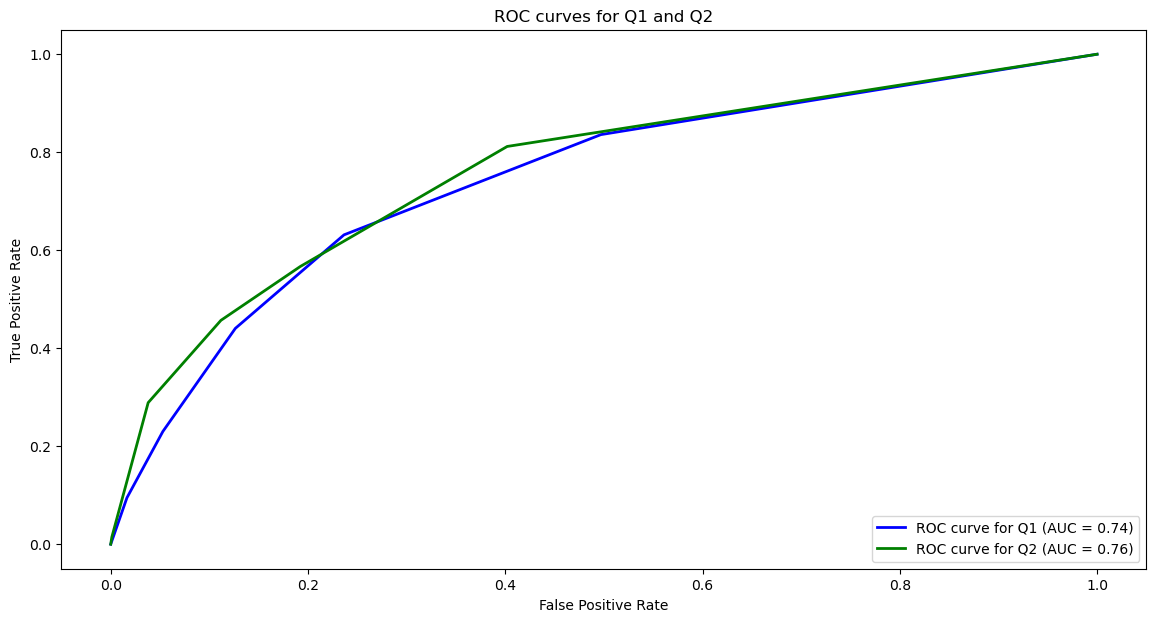

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC-AUC metrics for Q1
y_prob_q1 = knn_q1.predict_proba(x_test_q1)[:, 1]
fpr_q1, tpr_q1, thresholds_q1 = roc_curve(y_test_q1, y_prob_q1)
auc_q1 = roc_auc_score(y_test_q1, y_prob_q1)

# Calculate ROC-AUC metrics for Q2
y_prob_q2 = knn_q2.predict_proba(x_test_q2)[:, 1]
fpr_q2, tpr_q2, thresholds_q2 = roc_curve(y_test_q2, y_prob_q2)
auc_q2 = roc_auc_score(y_test_q2, y_prob_q2)

# Set up plot figure
plt.figure(figsize=(14, 7))

# Plot ROC-AUC curves
plt.plot(fpr_q1, tpr_q1, color='blue', lw=2, label=f'ROC curve for Q1 (AUC = {auc_q1:.2f})')
plt.plot(fpr_q2, tpr_q2, color='green', lw=2, label=f'ROC curve for Q2 (AUC = {auc_q2:.2f})')

# Configure plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves for Q1 and Q2")
plt.legend(loc="lower right")

plt.show()

The AUC values for both models are between 0.7 and 0.8 and the curves sit closer to the top-left of the plot, suggesting that they are effective at making accurate predictions. Q1's model has a 74% chance of correctly predicting whether an individual will make over <span>&dollar;</span>50k a year (74% accuracy), and Q2's model has a 76% chance. 

### Performing k-fold cross-validation

In [239]:
from sklearn.model_selection import cross_val_score

# Calculate k-fold cross-validation scores
q1_scores = cross_val_score(knn_q1, x_q1, y, cv=5, scoring="accuracy")
q2_scores = cross_val_score(knn_q2, x_q2, y, cv=5, scoring="accuracy")

In [240]:
# Show cross-validation scores for Q1 model
print("Q1 cross-validation scores:", q1_scores)
print("Mean score:", round(q1_scores.mean(), 3),"\n")

print("Q2 cross-validation scores:", q2_scores)
print("Mean score:", round(q2_scores.mean(), 3))

Q1 cross-validation scores: [0.76810874 0.75468258 0.76558355 0.7594496  0.76558355]
Mean score: 0.763 

Q2 cross-validation scores: [0.77374441 0.77308139 0.79990053 0.80520557 0.80951592]
Mean score: 0.792


The results of our k-fold cross-validation tests indicate that the Q1 model has an accuracy of about 76.3%, compared to the Q2 model's accuracy of ~79.2%. Thus, Q2's predictions are accurate 3% more of the time than Q1's, meaning that the combination of an individual's work class, occupation and marital status is a better set of predictors of whether they make over <span>&dollar;</span>50k a year than the combination of their age, education level, hours worked per week and capital gains. 

# Task 2.11
Include all mathematical formulas used and graphs representing the final outcomes.

All relevant formulas and graphs have been included in their respective tasks. 

# References
ChatGPT. (n.d.). https://chat.openai.com/ <br>
Gemini. (n.d.). https://gemini.google.com/app <br>